# Oil and Gas RIA Emission Scenario Test

This notebook takes example scripts from the FaIR model code and manipulates them to run emission scenarios from the O&G RIA (regulatory impact analysis)


## Set-Up Notebook

In [1]:
%matplotlib inline

In [2]:
import fair
fair.__version__

'1.6.4'

In [3]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (16, 9)

In [4]:
#Confirm working directory
import os
import time
modtime = os.path.getmtime('./OG_Test_Aug02.ipynb')
modificationTime = time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(modtime))
print("This file was last modified on: ", modificationTime)
print('')
print("The directory we are working in is {}" .format(os.getcwd()))

This file was last modified on:  2022-08-02 11:43:15

The directory we are working in is C:\Users\emcduf01\OneDrive - Environmental Protection Agency (EPA)\Documents\CCD-CSIB\FrEDI\Code\FAIR_v1.6.4\notebooks


## Import Input Data 

These data are already formatted for FaIR, in nt by 40 dimensions
##### The Year timeseries has to start at 1765
Columns are:
    0) Years
    1) Fossil CO2 (GtC/yr)
    2) Other CO2 (GtC/yr)
    3) CH4 (MtCH4/yr)
    4) N2O (MtN2O-N/yr)
    5) SOx (MtS/yr)
    6) CO (MtCO/yr)
    7) NMVOC (Mt/yr)
    8) NOx (MtN/yr)
    9) BC (Mt/yr)
    10) OC (Mt/yr)
    11) NH3 (MtN/yr)
    12) CF4 (kt/yr)
    13) C2F6 (kt/yr)
    14) C6F14 (kt/yr)
    15) HFC23 (kt/yr)
    16) HFC32 (kt/yr)
    17) HFC43_10 (kt/yr)
    18) HFC125 (kt/yr)
    19) HFC134a (kt/yr)
    20) HFC143a (kt/yr)
    21) HFC227ea (kt/yr)
    22) HFC245fa (kt/yr)
    23) SF6 (kt/yr)
    24) CFC_11 (kt/yr)
    25) CFC_12 (kt/yr)
    26) CFC_113 (kt/yr)
    27) CFC_114 (kt/yr)
    28) CFC_115 (kt/yr)
    29) CARB_TET (kt/yr)
    30) MCF (kt/yr)
    31) HCFC_22 (kt/yr)
    32) HCFC_141 (kt/yr)
    33) HCFC_142 (kt/yr)
    34) HALON1211 (kt/yr)
    35) HALON1202 (kt/yr)
    36) HALON1301 (kt/yr)
    37) HALON2402 (kt/yr)
    38) CH3BR (kt/yr)
    39) CH3CL (kt/yr)

In [5]:
emissions_ndc = pd.read_csv('../fair/InputData/O&G RIA/og_ndc_emissions.csv')#,usecols=np.arange(11))
emissions_ndc.rename(columns= {"v YEARS/GAS >":"Year"}, inplace=True)
display(emissions_ndc)
emissions_ndc= emissions_ndc.to_numpy()
#emissions_ndc = np.squeeze(emissions_ndc[:,1:2])
display(np.shape(emissions_ndc))

emissions_og_ch4 = pd.read_csv('../fair/InputData/O&G RIA/og_methane_emissions.csv')#,usecols=np.arange(11))
emissions_og_ch4.rename(columns= {"v YEARS/GAS >":"Year"}, inplace=True)
display(emissions_og_ch4)
emissions_og_ch4= emissions_og_ch4.to_numpy()
display(np.shape(emissions_og_ch4))

,Year,FossilCO2,OtherCO2,CH4,N2O,SOx,CO,NMVOC,NOx,BC,...,MCF,HCFC_22,HCFC_141B,HCFC_142B,HALON1211,HALON1202,HALON1301,HALON2402,CH3BR,CH3CL
0,1765,0.003000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00000,0.00000,0.00000,0.0000,0.0,0.00000,0.00000,157.2670,3100.211
1,1766,0.003000,0.005338,1.963262,0.005191,0.098883,9.050221,1.596875,0.109502,0.106998,...,0.0,0.00000,0.00000,0.00000,0.0000,0.0,0.00000,0.00000,157.2670,3100.211
2,1767,0.003000,0.010677,2.436448,0.010117,0.116307,12.960844,2.292316,0.168038,0.133383,...,0.0,0.00000,0.00000,0.00000,0.0000,0.0,0.00000,0.00000,157.2670,3100.211
3,1768,0.003000,0.016015,2.911105,0.015043,0.133811,16.876539,2.988648,0.226625,0.159847,...,0.0,0.00000,0.00000,0.00000,0.0000,0.0,0.00000,0.00000,157.2670,3100.211
4,1769,0.003000,0.021353,3.387278,0.019969,0.151398,20.797465,3.685897,0.285264,0.186393,...,0.0,0.00000,0.00000,0.00000,0.0000,0.0,0.00000,0.00000,157.2670,3100.211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2096,5.600905,-0.047769,337.262762,8.888815,15.825640,490.006820,165.497980,47.808000,5.356300,...,0.0,0.00548,1.49656,0.01506,0.0076,0.0,0.06348,0.00990,124.8302,4880.350
332,2097,5.559147,-0.048577,336.562395,8.894247,15.679880,490.169840,165.615510,47.909270,5.366150,...,0.0,0.00636,1.42252,0.01652,0.0077,0.0,0.06101,0.00945,124.9014,4881.470
333,2098,5.517389,-0.049384,335.862029,8.899680,15.534120,490.332860,165.733040,48.010540,5.376000,...,0.0,0.00724,1.34848,0.01798,0.0078,0.0,0.05854,0.00900,124.9726,4882.590
334,2099,5.475631,-0.050191,335.161663,8.905112,15.388360,490.495880,165.850570,48.111810,5.385850,...,0.0,0.00812,1.27444,0.01944,0.0079,0.0,0.05607,0.00855,125.0438,4883.710


(336, 40)

,Year,FossilCO2,OtherCO2,CH4,N2O,SOx,CO,NMVOC,NOx,BC,...,MCF,HCFC_22,HCFC_141B,HCFC_142B,HALON1211,HALON1202,HALON1301,HALON2402,CH3BR,CH3CL
0,1765,0.003000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.00000,0.00000,0.00000,0.0000,0.0,0.00000,0.00000,157.2670,3100.211
1,1766,0.003000,0.005338,1.963262,0.005191,0.098883,9.050221,1.596875,0.109502,0.106998,...,0.0,0.00000,0.00000,0.00000,0.0000,0.0,0.00000,0.00000,157.2670,3100.211
2,1767,0.003000,0.010677,2.436448,0.010117,0.116307,12.960844,2.292316,0.168038,0.133383,...,0.0,0.00000,0.00000,0.00000,0.0000,0.0,0.00000,0.00000,157.2670,3100.211
3,1768,0.003000,0.016015,2.911105,0.015043,0.133811,16.876539,2.988648,0.226625,0.159847,...,0.0,0.00000,0.00000,0.00000,0.0000,0.0,0.00000,0.00000,157.2670,3100.211
4,1769,0.003000,0.021353,3.387278,0.019969,0.151398,20.797465,3.685897,0.285264,0.186393,...,0.0,0.00000,0.00000,0.00000,0.0000,0.0,0.00000,0.00000,157.2670,3100.211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,2096,6.254798,-0.050085,334.419490,8.900080,15.825640,490.006820,165.497980,47.808000,5.356300,...,0.0,0.00548,1.49656,0.01506,0.0076,0.0,0.06348,0.00990,124.8302,4880.350
332,2097,6.204961,-0.051115,333.720690,8.905629,15.679880,490.169840,165.615510,47.909270,5.366150,...,0.0,0.00636,1.42252,0.01652,0.0077,0.0,0.06101,0.00945,124.9014,4881.470
333,2098,6.155124,-0.052146,333.021890,8.911179,15.534120,490.332860,165.733040,48.010540,5.376000,...,0.0,0.00724,1.34848,0.01798,0.0078,0.0,0.05854,0.00900,124.9726,4882.590
334,2099,6.105287,-0.053177,332.323090,8.916728,15.388360,490.495880,165.850570,48.111810,5.385850,...,0.0,0.00812,1.27444,0.01944,0.0079,0.0,0.05607,0.00855,125.0438,4883.710


(336, 40)

## Run FaIR

In [77]:
#Run emission scenarios
Cndc, Fndc, Tndc = fair.forward.fair_scm(emissions=emissions_ndc)#, useMultigas = False)
Cog, Fog, Tog = fair.forward.fair_scm(emissions=emissions_og_ch4)

#load in RCP6.0 scenario
from fair.RCPs import rcp3pd, rcp45, rcp6, rcp85
C60, F60, T60 = fair.forward.fair_scm(emissions=rcp45.Emissions.emissions)

## Plot Output (Concentrations, Forcing, Temperature)

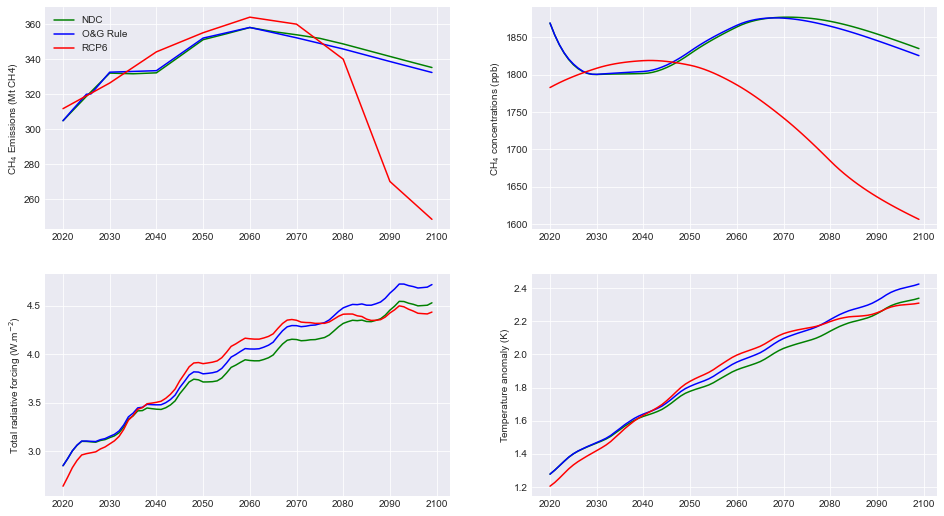

In [78]:
#Output Concentration Indices
#conversion of emissions to mixing ratio
# ppm, ppb, or ppt = emissions (Gt, Mt, or kt) *(1/(mass of atmosphere (kg)/1e18 * (mw_gas/mw_air))
#0) CO2 (ppm)
#1) CH4 (ppb)
#2) N2O (ppb)
#3) CF4 (ppt)
#4) C2F6 (ppt)
#5) C6F14 (ppt)
#6) HFC23 (ppt)
#7) HFC32 (ppt)
#8) HFC43_10 (ppt)
#9) HFC125 (ppt)
#10) HFC134a (ppt)
#11) HFC143a (ppt)
#12) HFC227ea (ppt)
#13) HFC245fa (ppt)
#14) SF6 (ppt)
#15) CFC_11 (ppt)
#16) CFC_12 (ppt)
#17) CFC_113 (ppt)
#18) CFC_114 (ppt)
#19) CFC_115 (ppt)
#20) CARB_TET (ppt)
#21) MCF (ppt)
#22) HCFC_22 (ppt)
#23) HCFC_141 (ppt)
#24) HCFC_142 (ppt)
#25) HALON1211 (ppt)
#26) HALON1202 (ppt)
#27) HALON1301 (ppt)
#28) HALON2402 (ppt)
#29) CH3BR (ppt)
#30) CH3CL (ppt)

#Output Forcing Indexes (all in W m-2)?:
#0) CO2
#1) CH4
#2) N2O
#3) Minor GHGs (CFCs, HFCs, etc.)
#4) Tropospheric Ozone
#5) Stratospheric Ozone
#6) Stratospheric Water vapour from methane oxidation
#7) Contrails
#8) Aerosols
#9) Black carbon on snow
#10) Land use
#11) Volcanic
#12) Solar

#Output Temperature 
#timeseries of temperature in K

year_idx = 0
CH4_emi_idx = 3
CH4_conc_idx = 1
plt_start_yr = 2020
plt_strop_yr = 2100

plt_start_idx = plt_start_yr - 1765
plt_stop_idx = plt_end_yr - 1765
#print(emissions_ndc[plt_start_idx,0],emissions_ndc[plt_stop_idx,0])

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


ax1.plot(emissions_ndc[plt_start_idx:plt_stop_idx,year_idx], emissions_ndc[plt_start_idx:plt_stop_idx,CH4_emi_idx], color='green', label='NDC')
ax2.plot(emissions_ndc[plt_start_idx:plt_stop_idx,year_idx], Cndc[plt_start_idx:plt_stop_idx,CH4_conc_idx], color='green')
ax3.plot(emissions_ndc[plt_start_idx:plt_stop_idx,year_idx], np.sum(Fndc, axis=1)[plt_start_idx:plt_stop_idx], color='green')
ax4.plot(emissions_ndc[plt_start_idx:plt_stop_idx,year_idx], Tndc[plt_start_idx:plt_stop_idx], color='green')

ax1.plot(emissions_og_ch4[plt_start_idx:plt_stop_idx,year_idx], emissions_og_ch4[plt_start_idx:plt_stop_idx,CH4_emi_idx], color='blue', label='O&G Rule')
ax2.plot(emissions_og_ch4[plt_start_idx:plt_stop_idx,year_idx], Cog[plt_start_idx:plt_stop_idx,CH4_conc_idx], color='blue')
ax3.plot(emissions_og_ch4[plt_start_idx:plt_stop_idx,year_idx], np.sum(Fog, axis=1)[plt_start_idx:plt_stop_idx], color='blue')
ax4.plot(emissions_og_ch4[plt_start_idx:plt_stop_idx,year_idx], Tog[plt_start_idx:plt_stop_idx], color='blue')

#C60, F60, T60 = fair.forward.fair_scm(emissions=rcp6.Emissions.emissions)
ax1.plot(rcp6.Emissions.year[plt_start_idx:plt_stop_idx], rcp6.Emissions.ch4[plt_start_idx:plt_stop_idx], color='red', label='RCP6')
ax2.plot(rcp6.Emissions.year[plt_start_idx:plt_stop_idx], C60[plt_start_idx:plt_stop_idx, 1], color='red')
ax3.plot(rcp6.Emissions.year[plt_start_idx:plt_stop_idx], np.sum(F60, axis=1)[plt_start_idx:plt_stop_idx], color='red')
ax4.plot(rcp6.Emissions.year[plt_start_idx:plt_stop_idx], T60[plt_start_idx:plt_stop_idx], color='red')

#C85, F85, T85 = fair.forward.fair_scm(emissions=rcp85.Emissions.emissions)
#ax1.plot(rcp85.Emissions.year, rcp85.Emissions.co2_fossil, color='black', label='RCP8.5')
#ax2.plot(rcp85.Emissions.year, C85[:, 0], color='black')
#ax3.plot(rcp85.Emissions.year, np.sum(F85, axis=1), color='black')
#ax4.plot(rcp85.Emissions.year, T85, color='black')

ax1.set_ylabel('CH$_4$ Emissions (Mt CH4)')
ax1.legend()
ax2.set_ylabel('CH$_4$ concentrations (ppb)')
ax3.set_ylabel('Total radiative forcing (W.m$^{-2}$)')
ax4.set_ylabel('Temperature anomaly (K)');

## Save Output to CSV

In [111]:
#df = np.append(year, Cndc,axis=1)
#display(np.shape(df))
#pd.Dataframe(df)
display(Tndc)
#B = np.reshape(Tndc, (Tndc.size,2))
df = np.column_stack((year,Tndc))
#df = np.concatenate([Tndc,year])
display(np.shape(df))
#B = np.reshape(df, (-1,2))
display((df))

array([ 5.06084984e-03,  9.26225009e-03,  1.36290145e-02,  2.17495963e-02,
        3.11835668e-02,  4.13803761e-02,  4.70228652e-02,  4.68024283e-02,
        4.65277310e-02,  4.56469486e-02,  4.19731830e-02,  3.85487191e-02,
        3.67026880e-02,  3.58745685e-02,  3.03765744e-02,  2.62407290e-02,
        2.49774282e-02,  2.68090240e-02, -4.67381528e-01, -3.95901483e-01,
       -3.13685413e-01, -2.41210220e-01, -1.80933156e-01, -1.38706952e-01,
       -1.05894745e-01, -8.04127586e-02, -5.97294650e-02, -4.29657493e-02,
       -3.10492904e-02, -3.14110060e-02, -1.84861515e-02, -5.77737326e-02,
       -4.50610642e-02, -3.17777218e-02, -2.06023721e-02, -1.23675960e-02,
       -1.24079331e-02, -4.73698481e-03,  1.60524818e-03, -7.71153814e-03,
       -5.44251794e-03,  7.15821912e-04,  4.60017072e-03,  7.13669963e-03,
       -4.26100816e-01, -4.73208948e-01, -4.21803089e-01, -3.48499439e-01,
       -2.78268552e-01, -2.15857606e-01, -8.95357964e-01, -9.85737010e-01,
       -9.23275830e-01, -

TypeError: _column_stack_dispatcher() takes 1 positional argument but 2 were given

In [114]:

out_types = ['Concentration_', 'Forcing_', 'Temperature_']
#for x in range(len(outs)):
#    for y in range(len(out_types)):
#year = np.zeros([len(emissions_ndc),1])
#year[:,0] = emissions_ndc[:,0].astype(int)
year = emissions_ndc[:,0].astype(int)
concentration_columns = ["Year","CO2_ppm","CH4_ppb","N2O_ppb",\
        "CF4_ppt","C2F6_ppt","C6F14_ppt","HFC23_ppt","HFC32_ppt",\
        "HFC43_10_ppt","HFC125_ppt","HFC134a_ppt","HFC143a_ppt",\
        "HFC227ea_ppt","HFC245fa_ppt","SF6_ppt","CFC_11_ppt",\
        "CFC_12_ppt","CFC_113_ppt","CFC_114_ppt","CFC_115_ppt",\
        "CARB_TET_ppt","MCF_ppt","HCFC_22_ppt","HCFC_141_ppt",\
        "HCFC_142_ppt","HALON1211_ppt","HALON1202_ppt","HALON1301_ppt",\
        "HALON2402_ppt","CH3BR_ppt","CH3CL_ppt"]
forcing_columns = ["Year","CO2_Wm-2","CH4_Wm-2","N2O_Wm-2","Minor_GHGs_Wm-2",\
        "TropO3_Wm-2","StratO3_Wm-2","StratH2O_CH4ox_Wm-2",\
        "Contrails","Aerosols","SnowBC_Wm-2","Landuse_Wm-2",\
        "Volcanic_Wm-2","Solar_Wm-2"]
temperature_columns = ["Year",'TempAnom_K']

#Save NDC
display(np.shape(year))
display(np.shape(Tndc))
#np.insert(arr, 0, col, axis=1)
df = pd.DataFrame(np.insert(Cndc,0,year,axis=1),columns =concentration_columns)
df.to_csv("../fair/OutputData/%s%s.csv"%(out_types[0], 'NDC'),index=False)
df = pd.DataFrame(np.insert(Fndc,0,year,axis=1),columns =forcing_columns)
df.to_csv("../fair/OutputData/%s%s.csv"%(out_types[1], 'NDC'),index=False)
df = pd.DataFrame(np.column_stack((year,Tndc)),columns =temperature_columns)
df.to_csv("../fair/OutputData/%s%s.csv"%(out_types[2], 'NDC'),index=False)
#Save OG
df = pd.DataFrame(np.insert(Cndc,0,year,axis=1),columns =concentration_columns)
df.to_csv("../fair/OutputData/%s%s.csv"%(out_types[0], 'OG_rule'),index=False)
df = pd.DataFrame(np.insert(Fndc,0,year,axis=1),columns =forcing_columns)
df.to_csv("../fair/OutputData/%s%s.csv"%(out_types[1], 'OG_rule'),index=False)
df = pd.DataFrame(np.column_stack((year,Tog)),columns =temperature_columns)
df.to_csv("../fair/OutputData/%s%s.csv"%(out_types[2], 'OG_rule'),index=False)


(336,)

(336,)

# FaIR

This notebook gives some simple examples of how to run and use the Finite Amplitude Impulse Response (FaIR) model. 

The  Finite  Amplitude  Impulse  Response  (FaIR)  model  is  a  simple emissions-based climate model. It allows the user to input emissions of greenhouse gases and short lived climate forcers in order to estimate global mean atmospheric GHG concentrations, radiative forcing and temperature anomalies.

The original FaIR model (v1.0) was developed to simulate the earth system response to CO$_2$ emissions, with all non-CO$_2$ forcing implemented as an "external" source. It was developed by Richard Millar, Zebedee Nicholls, Pierre Friedlingstein and Myles Allen. The motivation for developing it and its formulation is documented in  a  paper  published  in  Atmospheric  Chemistry  and  Physics  in  2017 (doi:10.5194/acp-2016-405).

The emissions-based model extends FaIR by replacing all sources of non-CO$_2$ forcing with relationships that are based on the source emissions, with the exception of natural forcings (viz. variations in solar irradiance and volcanic eruptions). It is useful for assessing future policy commitments to anthropogenic emissions (something which we can control) than to radiative forcing (something which is less certain and which we can only partially control).

The emissions based model was developed by Chris Smith with input from Piers Forster, Leighton Regayre and Giovanni Passerello, in parallel with Nicolas Leach, Richard Millar and Myles Allen.

## Basic run

Here we show how FaIR can be run with step change CO$_2$ emissions and sinusoidal non-CO$_2$ forcing timeseries.

In [ ]:
emissions = np.zeros(250)
emissions[125:] = 10.0
other_rf = np.zeros(emissions.size)
for x in range(0, emissions.size):
    other_rf[x] = 0.5 * np.sin(2 * np.pi * (x) / 14.0)
    
C,F,T = fair.forward.fair_scm(
    emissions=emissions,
    other_rf=other_rf,
    useMultigas=False
)

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax1.plot(range(0, emissions.size), emissions, color='black')
ax1.set_ylabel('Emissions (GtC)')
ax2 = fig.add_subplot(222)
ax2.plot(range(0, emissions.size), C, color='blue')
ax2.set_ylabel('CO$_2$ concentrations (ppm)')
ax3 = fig.add_subplot(223)
ax3.plot(range(0, emissions.size), other_rf, color='orange')
ax3.set_ylabel('Other radiative forcing (W.m$^{-2}$)')
ax4 = fig.add_subplot(224)
ax4.plot(range(0, emissions.size), T, color='red')
ax4.set_ylabel('Temperature anomaly (K)');

## RCPs

We can run FaIR with the CO$_2$ emissions and non-CO$_2$ forcing from the four representative concentration pathway scenarios. To use the emissions-based version specify ```useMultigas=True``` in the call to ```fair_scm()```.

By default in multi-gas mode, volcanic and solar forcing plus natural emissions of methane and nitrous oxide are switched on.

In [ ]:
display(np.shape(rcp3pd.Emissions.emissions))

In [ ]:
from fair.RCPs import rcp3pd, rcp45, rcp6, rcp85

fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

C26, F26, T26 = fair.forward.fair_scm(emissions=rcp3pd.Emissions.emissions)
ax1.plot(rcp3pd.Emissions.year, rcp3pd.Emissions.co2_fossil, color='green', label='RCP3PD')
ax2.plot(rcp3pd.Emissions.year, C26[:, 0], color='green')
ax3.plot(rcp3pd.Emissions.year, np.sum(F26, axis=1), color='green')
ax4.plot(rcp3pd.Emissions.year, T26, color='green')

C45, F45, T45 = fair.forward.fair_scm(emissions=rcp45.Emissions.emissions)
ax1.plot(rcp45.Emissions.year, rcp45.Emissions.co2_fossil, color='blue', label='RCP4.5')
ax2.plot(rcp45.Emissions.year, C45[:, 0], color='blue')
ax3.plot(rcp45.Emissions.year, np.sum(F45, axis=1), color='blue')
ax4.plot(rcp45.Emissions.year, T45, color='blue')

C60, F60, T60 = fair.forward.fair_scm(emissions=rcp6.Emissions.emissions)
ax1.plot(rcp6.Emissions.year, rcp6.Emissions.co2_fossil, color='red', label='RCP6')
ax2.plot(rcp6.Emissions.year, C60[:, 0], color='red')
ax3.plot(rcp6.Emissions.year, np.sum(F60, axis=1), color='red')
ax4.plot(rcp6.Emissions.year, T60, color='red')

C85, F85, T85 = fair.forward.fair_scm(emissions=rcp85.Emissions.emissions)
ax1.plot(rcp85.Emissions.year, rcp85.Emissions.co2_fossil, color='black', label='RCP8.5')
ax2.plot(rcp85.Emissions.year, C85[:, 0], color='black')
ax3.plot(rcp85.Emissions.year, np.sum(F85, axis=1), color='black')
ax4.plot(rcp85.Emissions.year, T85, color='black')

ax1.set_ylabel('Fossil CO$_2$ Emissions (GtC)')
ax1.legend()
ax2.set_ylabel('CO$_2$ concentrations (ppm)')
ax3.set_ylabel('Total radiative forcing (W.m$^{-2}$)')
ax4.set_ylabel('Temperature anomaly (K)');

## Concentrations of well-mixed greenhouse gases

The output of FaIR (in most cases) is a 3-element tuple of concentrations, effective radiative forcing and temperature change since pre-industrial. Concentrations are a 31-column array of greenhouse gases. The indices correspond to the order given in the RCP concentration datasets (table 2 in Smith et al., https://www.geosci-model-dev-discuss.net/gmd-2017-266/). We can investigate the GHG concentrations coming out of the model:

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(rcp3pd.Emissions.year, C26[:,1], color='green', label='RCP3PD')
ax1.plot(rcp45.Emissions.year, C45[:,1], color='blue', label='RCP4.5')
ax1.plot(rcp6.Emissions.year, C60[:,1], color='red', label='RCP6')
ax1.plot(rcp85.Emissions.year, C85[:,1], color='black', label='RCP8.5')
ax1.set_title("Methane concentrations, ppb")

ax2.plot(rcp3pd.Emissions.year, C26[:,2], color='green', label='RCP3PD')
ax2.plot(rcp45.Emissions.year, C45[:,2], color='blue', label='RCP4.5')
ax2.plot(rcp6.Emissions.year, C60[:,2], color='red', label='RCP6')
ax2.plot(rcp85.Emissions.year, C85[:,2], color='black', label='RCP8.5')
ax2.set_title("Nitrous oxide concentrations, ppb")

# How to convert the H and F gases to single-species equivalents? Weight by radiative efficiency.
from fair.constants import radeff
C26_hfc134a_eq = np.sum(C26[:,3:15]*radeff.aslist[3:15],axis=1)/radeff.HFC134A   # indices 3:15 are HFCs and PFCs
C45_hfc134a_eq = np.sum(C45[:,3:15]*radeff.aslist[3:15],axis=1)/radeff.HFC134A
C60_hfc134a_eq = np.sum(C60[:,3:15]*radeff.aslist[3:15],axis=1)/radeff.HFC134A
C85_hfc134a_eq = np.sum(C85[:,3:15]*radeff.aslist[3:15],axis=1)/radeff.HFC134A

C26_cfc12_eq = np.sum(C26[:,15:31]*radeff.aslist[15:31],axis=1)/radeff.CFC12   # indices 15:31 are ozone depleters
C45_cfc12_eq = np.sum(C45[:,15:31]*radeff.aslist[15:31],axis=1)/radeff.CFC12
C60_cfc12_eq = np.sum(C60[:,15:31]*radeff.aslist[15:31],axis=1)/radeff.CFC12
C85_cfc12_eq = np.sum(C85[:,15:31]*radeff.aslist[15:31],axis=1)/radeff.CFC12

ax3.plot(rcp3pd.Emissions.year, C26_hfc134a_eq, color='green', label='RCP3PD')
ax3.plot(rcp45.Emissions.year, C45_hfc134a_eq, color='blue', label='RCP4.5')
ax3.plot(rcp6.Emissions.year, C60_hfc134a_eq, color='red', label='RCP6')
ax3.plot(rcp85.Emissions.year, C85_hfc134a_eq, color='black', label='RCP8.5')
ax3.set_title("HFC134a equivalent concentrations, ppt")

ax4.plot(rcp3pd.Emissions.year, C26_cfc12_eq, color='green', label='RCP3PD')
ax4.plot(rcp45.Emissions.year, C45_cfc12_eq, color='blue', label='RCP4.5')
ax4.plot(rcp6.Emissions.year, C60_cfc12_eq, color='red', label='RCP6')
ax4.plot(rcp85.Emissions.year, C85_cfc12_eq, color='black', label='RCP8.5')
ax4.set_title("CFC12 equivalent concentrations, ppt")
ax1.legend()

## Radiative forcing
We consider 13 separate species of radiative forcing: CO$_2$, CH$_4$, N$_2$O, minor GHGs, tropospheric ozone, stratospheric ozone, stratospheric water vapour from methane oxidation, contrails, aerosols, black carbon on snow, land use change, volcanic and solar (table 3 in Smith et al., https://www.geosci-model-dev.net/11/2273/2018/gmd-11-2273-2018.pdf). Here we show some of the more interesting examples.

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(rcp3pd.Emissions.year, F26[:,4], color='green', label='RCP3PD')
ax1.plot(rcp45.Emissions.year, F45[:,4], color='blue', label='RCP4.5')
ax1.plot(rcp6.Emissions.year, F60[:,4], color='red', label='RCP6')
ax1.plot(rcp85.Emissions.year, F85[:,4], color='black', label='RCP8.5')
ax1.set_title("Tropospheric ozone forcing, W m$^{-2}$")

ax2.plot(rcp3pd.Emissions.year, F26[:,5], color='green', label='RCP3PD')
ax2.plot(rcp45.Emissions.year, F45[:,5], color='blue', label='RCP4.5')
ax2.plot(rcp6.Emissions.year, F60[:,5], color='red', label='RCP6')
ax2.plot(rcp85.Emissions.year, F85[:,5], color='black', label='RCP8.5')
ax2.set_title("Stratospheric ozone forcing, W m$^{-2}$")

ax3.plot(rcp3pd.Emissions.year, F26[:,8], color='green', label='RCP3PD')
ax3.plot(rcp45.Emissions.year, F45[:,8], color='blue', label='RCP4.5')
ax3.plot(rcp6.Emissions.year, F60[:,8], color='red', label='RCP6')
ax3.plot(rcp85.Emissions.year, F85[:,8], color='black', label='RCP8.5')
ax3.set_title("Aerosol forcing, W ~m$^{-2}$")

ax4.plot(rcp3pd.Emissions.year, F26[:,10], color='green', label='RCP3PD')
ax4.plot(rcp45.Emissions.year, F45[:,10], color='blue', label='RCP4.5')
ax4.plot(rcp6.Emissions.year, F60[:,10], color='red', label='RCP6')
ax4.plot(rcp85.Emissions.year, F85[:,10], color='black', label='RCP8.5')
ax4.set_title("Land use forcing, W m$^{-2}$")
ax1.legend();

## Ensemble generation
An advantage of FaIR is that it is very quick to run (much less than a second on an average machine). Therefore it can be used to generate probabilistic future ensembles. We'll show a 100-member ensemble.

In [ ]:
from scipy import stats
from fair.tools.ensemble import tcrecs_generate

# generate some joint lognormal TCR and ECS pairs
tcrecs = tcrecs_generate(n=100, seed=38571)

# generate some forcing scale factors with SD of 10% of the best estimate
F_scale = stats.norm.rvs(size=(100,13), loc=1, scale=0.1, random_state=40000)

# do the same for the carbon cycle parameters
r0 = stats.norm.rvs(size=100, loc=35, scale=3.5, random_state=41000)
rc = stats.norm.rvs(size=100, loc=0.019, scale=0.0019, random_state=42000)
rt = stats.norm.rvs(size=100, loc=4.165, scale=0.4165, random_state=45000)

T = np.zeros((736,100))

In [ ]:
%%time
for i in range(100):
    _, _, T[:,i] = fair.forward.fair_scm(emissions=rcp85.Emissions.emissions,
                        r0 = r0[i],
                        rc = rc[i],
                        rt = rt[i],
                        tcrecs = tcrecs[i,:],
                        scale = F_scale[i,:],
                        F2x = 3.74*F_scale[i,0])   # scale F2x with the CO2 scaling factor for consistency

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(rcp85.Emissions.year, T);

The resulting projections show a large spread. Some of these ensemble members are unrealistic, ranging from around 0.4 to 2.0 K temperature change in the present day, whereas we know in reality it is more like 0.9 (plus or minus 0.2). Therefore we can constrain this ensemble to observations.

In [ ]:
try:
    # For Python 3.0 and later
    from urllib.request import urlopen
except ImportError:
    # Fall back to Python 2's urllib2
    from urllib2 import urlopen
    
from fair.tools.constrain import hist_temp

# load up Cowtan and Way data remotely
url = 'http://www-users.york.ac.uk/~kdc3/papers/coverage2013/had4_krig_annual_v2_0_0.txt'
response = urlopen(url)

CW = np.loadtxt(response)
constrained = np.zeros(100, dtype=bool)

for i in range(100):
    # we use observed trend from 1880 to 2016
    constrained[i], _, _, _, _ = hist_temp(CW[30:167,1], T[1880-1765:2017-1765,i], CW[30:167,0])
    
# How many ensemble members passed the constraint?
print('%d ensemble members passed historical constraint' % np.sum(constrained))

In [ ]:
# What does this do to the ensemble?
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.plot(rcp85.Emissions.year, T[:,constrained]);

Some, but not all, of the higher end scenarios have been constrained out, but there is still quite a large range of total temperature change projected for 2500 even under this constraint.

From these constraints it is possible to obtain posterior distributions on effective radiative forcing, ECS, TCR, TCRE and other metrics.